## Sequence
A sequence is an ordered collection of values.
Sequences are not instances of a paticular data type, but a collection of behaviors shared among several different types of data:    
- Length. A sequence has a finite length. An empty sequence has length 0.
- Element Selection. A sequence has an element corresponding to any non-negetive integer index ess than its length. starting at 0.


## List
Lists are a built-in sequence type in Python

In [6]:
digits = [1, 8, 2, 8]

In [7]:
digits[3]

8

In [8]:
len(digits)

4

#### Concatenation and repetition

In [9]:
[2, 7] + digits * 2

[2, 7, 1, 8, 2, 8, 1, 8, 2, 8]

In [10]:
from operator import add, mul
add([2, 7], mul(digits, 2))

[2, 7, 1, 8, 2, 8, 1, 8, 2, 8]

#### Nested Lists

In [11]:
pairs = [[10, 20], [30, 40]]
pairs[0]

[10, 20]

## Container
Lists contain other values.     
There are built-in operators for testing whether an element appears in a compound value.

In [12]:
digits = [1, 8, 2, 8]
1 in digits

True

In [13]:
'1' in digits

False

In [14]:
[1, 8] in digits

False

## Sequence Iteration
### For Statements


In [15]:
def count(s, value):
    total, index = 0, 0
    while index < len(s):
        element = s[index]

        if element == value:
            total += 1

        index += 1
    return total

In [16]:
def count(s, value):
    total = 0
    for element in s:
        if element == value:
            total += 1
    return total

#### Execution Procedure
```
for <name> in <expression>
    <suite>
```
1. Evaluate the header `<expression>`, which must yield an iterable value(a sequence).
2. For each element in that sequence, in order:
- Bind `<name>` to that element in the current frame
- Execute the `<suite>`    
`<name>` will be bound to the last element of the sequence after the `for` statement is executed.

#### Sequence Unpacking in For Statements
A `for` statement may include multiple names in its header to "unpack" each element sequence into its respective elements.   
Same with binding multiple names to multiple values.


In [17]:
pairs = [[1, 2], [2, 2], [3, 2], [4, 4]]
same_count = 0
for x, y in pairs:
    #[x, y] just unpacked
    if x == y:
        same_count = same_count + 1

same_count

2

## Ranges
Ranges are another sequence type.   
A range is a sequence of consecutive intergers(a range could represent more general integer sequences).
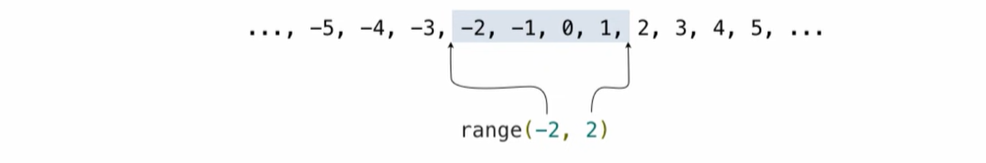

Length: ending value - starting value    
Element selection: starting value + index

In [23]:
range(1, 10)

range(1, 10)

#### Convert range to list

In [18]:
list(range(-2, 2))

[-2, -1, 0, 1]

A common convention is to use a single underscore character for the name in the `for` header if the name is unused in the suite.

In [24]:
for _ in range(3):
    print("Go Bears!")

Go Bears!
Go Bears!
Go Bears!


## Sequence Processing
### List Comprehensions
List comprehensions are a powerful form of combination inthe Python language.       
`[<map expression> for <name> in <sequnece expression> if <filter expression>]`

In [19]:
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
[letters[i] for i in [3, 4, 6]]

['d', 'e', 'g']

In [20]:
odds = [1, 3, 5, 7, 9]
[x+1 for x in odds]

[2, 4, 6, 8, 10]

In [21]:
[x for x in odds if 25 % x == 0]

[1, 5]

In [22]:
def divisors(n):
    return [1] + [x for x in range(2, n) if n % x == 0]
divisors(16)


[1, 2, 4, 8]

### Aggregation
To aggregate all values in a sequence into a single value.    
By combining the patterns of evaluation an expression for each element, selecting a subset of elements, and aggregating elements, we can solve problems using a sequence processing approach.

In [25]:
def divisors(n):
    return [1] + [x for x in range(2, n) if n % x == 0]

In [26]:
divisors(4)

[1, 2]

In [27]:
[n for n in range(1, 1000) if sum(divisors(n))==n]

[1, 6, 28, 496]

### Higher-Order Functions
The common patterns we have observed in sequence processing can be expressed using higher-order function.    

Evaluating an expression for each element in a sequence:

In [35]:
def apply_to_all(map_fn, s):
    return [map_fn(x) for x in s]

Selecting only elements for which some  expression is true:

In [36]:
def keep_if(filter_fn, s):
    return [x for x in s if filter_fn(x)]

Aggregating:

In [37]:
def reduce(reduce_fn, s, initial):
    reduced = initial
    for x in s:
        reduced = reduce_fn(reduced, x)
    return reduced

In [38]:
reduce(mul, [2, 4, 8], 1)

64

In [43]:
def divisors_of(n):
    divides_n = lambda x: n % x == 0
    return [1] + keep_if(divides_n, range(2, n))

In [44]:
from operator import add
def sum_of_divisors(n):
    return reduce(add, divisors_of(n), 0)

In [45]:
def perfect(n):
    return sum_of_divisors(n) == n

In [46]:
keep_if(perfect, range(1, 1000))

[1, 6, 28, 496]

### Map, Filter, Reduce
In Python, the built-in `map` and `filter` are generalizations of these functions(`apply_to_all` and `keep_if`) that do not return list.

In [48]:
apply_to_all = lambda map_fn, s: list(filter(map_fn, s))
keep_if = lambda filter_fn, s: list(filter(filter_fn, s))

[1, 6, 28, 496]

The `reduce` function is built into `functools` module of the Python standard library.

In [51]:
from functools import reduce
from operator import mul
def product(s):
    return reduce(mul, s)

## Sequence Abstraction
Apart from length and element selection, Python includes 2 more behaviors of sequence types that extend the sequence abstraction.
### Membership
A value can be tested for membership in a sequence.

In [52]:
digits = [1, 8, 2, 8]

In [53]:
2 in digits

True

In [54]:
1828 not in digits

True

### Slicing
A slice of a sequence is any contiguous span of the original sequence.

These addtional behaviors helps to reflect upon what constitutes a useful data abstraction in general.   
The richness of an abstraction has consequences.
- additional behaviors can be helpful
- can be expensive to learn